In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from vgg16 import vgg16

In [4]:
# Parameters
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 16

train_dir = '../data/train'
test_dir = '../data/test'

In [10]:
# Creating train and val generator with ImageDataGenerator so can easy divide between
# train and val dataset and add some data augumentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% de las imagenes para test
    # data augumentation
    height_shift_range=0.15,
    width_shift_range=0.15,
    zoom_range=0.2,
    rotation_range=30
)

train_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
    class_mode='binary',
    subset='validation'
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


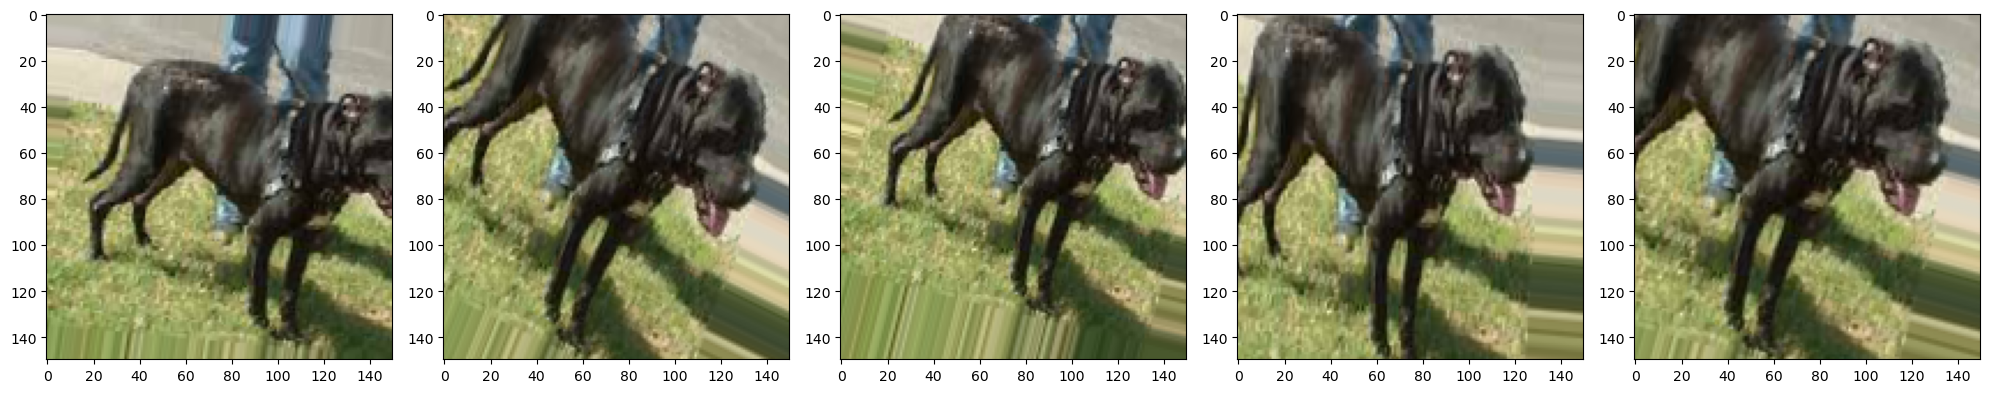

In [13]:
def plot_images(images_array):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_array, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_generator[1][0][0] for i in range(5)]
plot_images(augmented_images)

In [ ]:
model = vgg16(2, (IMAGE_WIDTH, IMAGE_HEIGHT, 3))